In [3]:
import sys
from pathlib import Path

import json
import os
import numpy as np
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from scipy import interpolate

sys.path.append('..')
import helpers as h
import cv2 as cv
import matplotlib.image as mpimg

MASK_FOLDER = '../dataset_pericardium/label'
COMBINED_FOLDER = '../data/gt_combined'

In [6]:
with open('../data/label_help/ACel/1d5cb60e97ecab3a70f5c92bf3184807-asset.json') as json_file:
    data = json.load(json_file)

file_name = data['asset']['name']
region = data['regions'][0]
points = [(p['x'], p['y']) for p in region['points']]
points

[(333.9767191977077, 40.46137401504298),
 (293.88699856733524, 44.79747940544412),
 (240.759670487106, 55.48032324498567),
 (207.40410100286533, 62.57786756805157),
 (161.8843123209169, 68.61586676217765),
 (135.05587392550143, 86.91322304799426),
 (123.78259312320917, 111.05526952005731),
 (123.23352435530086, 135.89297546561605),
 (110.21042263610315, 173.4394699140401),
 (111.73585243553008, 193.80197886819482),
 (122.46113896848136, 241.89026683381087),
 (126.62544770773638, 269.95500537249285),
 (133.51531160458453, 302.34892102435526),
 (159.86864255014325, 313.38453617478507),
 (191.00501432664757, 323.70845272206304),
 (240.20885565902577, 324.5899892550143),
 (291.62759670487105, 309.32131984240687),
 (328.56908130372494, 282.88424516475646),
 (361.95352793696276, 253.98043517191977),
 (396.90933918338106, 217.42263610315186),
 (420.8635386819484, 178.45527399713467),
 (427.76222242120343, 136.79121149713467),
 (422.97201826647563, 101.39044591690543),
 (404.33936246418335, 70

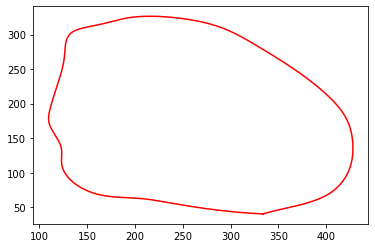

In [7]:
points = np.array(points)
x = points[:,0]
y = points[:,1]
x = np.r_[x, x[0]]
y = np.r_[y, y[0]]

tck, u = interpolate.splprep([x, y], s = 0)
unew = np.linspace(0, 1, 1000)
out = interpolate.splev(unew, tck)

plt.figure()
plt.plot(out[0], out[1], 'r-')
plt.show()

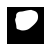

In [12]:
fig = plt.figure(frameon=False, figsize=(0.512, 0.512))
img = np.zeros((512, 512))

ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)

ax.imshow(img, cmap='gray')
ax.fill(out[0], out[1], 'w')
plt.savefig('test.png', dpi=1000)

[[333  40]
 [333  40]
 [332  40]
 ...
 [335  41]
 [334  40]
 [333  40]]


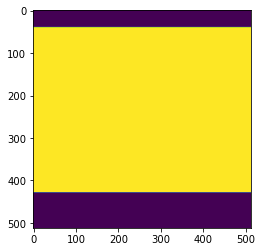

In [8]:
img = np.zeros((512, 512))
points = np.array((out[0].ravel(), out[1].ravel()), dtype=np.int).T
print(points)
img[points] = 1
plt.imshow(img)

In [1]:
dataset_folder = '../data/dataset_pericardium_manual'
input_folder = '../data/label_help'

In [33]:
data['asset']['path']

'file:/Users/marinbenc/projects_clean/double_unet_repro/data/label_help/ACel/030.png'

In [4]:
patients = h.listdir(input_folder)
patients.remove('Perciardium_ACel.vott')
patients.sort()
patients

['ACel',
 'AEdu',
 'AFre',
 'AMar',
 'AXav',
 'CFer',
 'CLis',
 'DLag',
 'DSan',
 'DSil',
 'EGra',
 'FGas',
 'FPiq',
 'ISou',
 'JFul',
 'JMir',
 'MPai',
 'MSil',
 'TJes',
 'VMar']

In [5]:
def save_label_image(label_file):
    with open(label_file) as json_file:
        data = json.load(json_file)
    region = data['regions'][0]
    points = [(p['x'], p['y']) for p in region['points']]
    
    points = np.array(points)
    x = points[:,0]
    y = points[:,1]
    x = np.r_[x, x[0]]
    y = np.r_[y, y[0]]

    tck, u = interpolate.splprep([x, y], s = 0)
    unew = np.linspace(0, 1, 1000)
    out = interpolate.splev(unew, tck)
    
    fig = plt.figure(frameon=False, figsize=(0.512, 0.512))
    img = np.zeros((512, 512))

    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)

    ax.imshow(img, cmap='gray')
    ax.fill(out[0], out[1], 'w')
    
    save_location = data['asset']['path'].replace('file:', '')
    save_location = save_location.replace('label_help', 'dataset_pericardium_manual')
    
    plt.savefig(save_location, dpi=1000)
    img = cv.imread(save_location)
    cv.imwrite(save_location, img[:, :, 1])

<ipython-input-5-252363e4c816>:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(frameon=False, figsize=(0.512, 0.512))


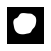

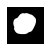

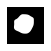

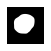

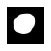

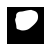

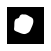

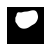

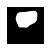

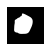

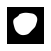

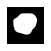

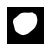

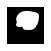

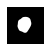

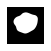

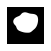

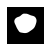

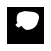

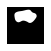

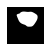

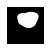

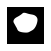

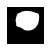

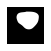

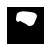

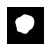

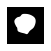

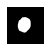

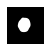

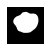

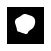

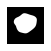

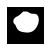

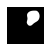

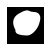

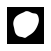

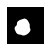

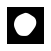

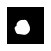

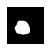

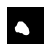

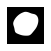

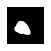

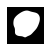

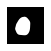

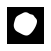

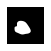

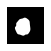

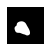

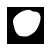

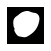

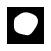

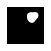

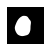

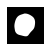

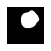

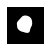

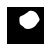

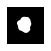

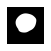

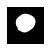

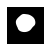

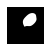

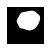

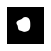

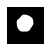

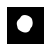

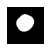

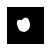

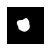

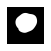

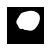

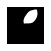

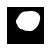

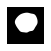

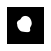

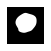

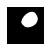

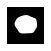

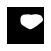

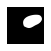

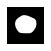

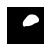

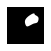

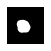

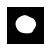

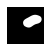

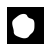

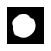

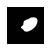

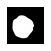

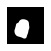

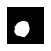

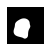

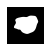

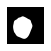

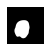

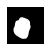

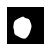

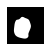

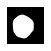

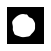

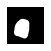

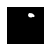

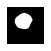

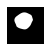

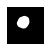

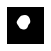

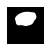

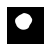

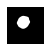

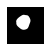

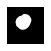

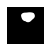

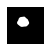

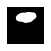

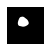

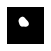

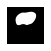

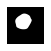

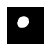

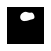

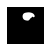

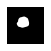

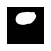

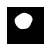

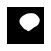

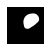

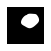

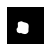

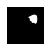

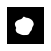

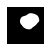

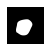

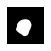

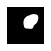

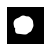

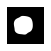

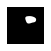

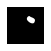

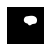

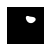

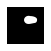

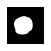

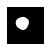

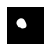

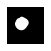

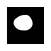

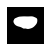

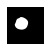

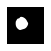

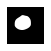

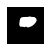

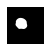

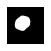

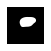

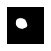

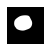

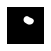

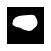

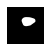

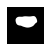

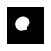

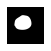

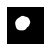

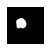

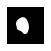

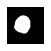

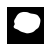

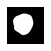

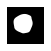

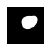

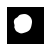

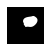

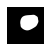

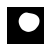

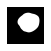

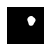

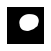

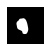

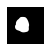

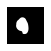

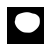

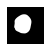

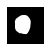

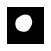

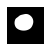

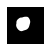

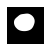

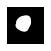

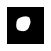

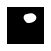

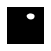

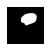

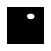

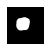

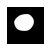

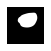

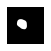

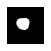

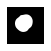

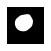

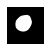

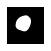

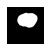

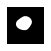

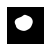

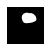

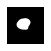

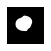

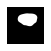

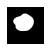

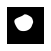

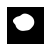

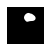

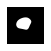

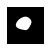

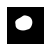

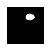

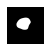

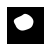

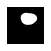

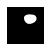

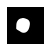

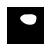

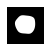

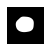

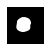

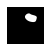

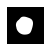

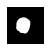

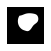

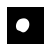

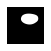

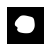

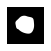

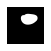

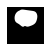

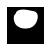

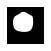

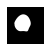

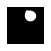

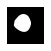

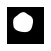

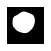

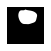

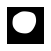

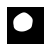

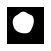

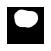

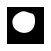

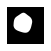

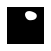

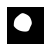

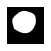

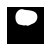

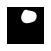

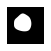

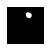

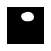

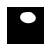

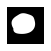

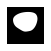

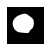

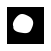

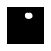

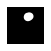

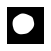

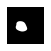

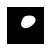

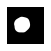

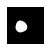

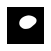

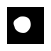

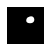

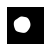

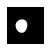

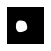

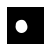

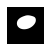

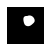

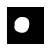

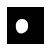

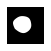

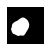

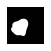

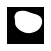

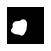

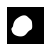

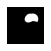

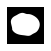

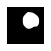

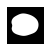

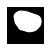

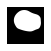

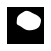

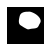

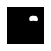

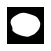

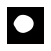

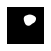

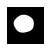

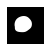

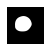

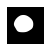

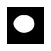

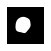

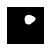

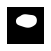

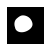

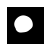

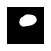

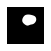

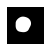

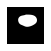

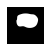

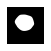

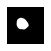

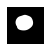

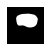

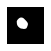

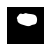

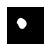

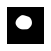

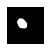

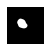

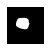

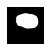

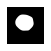

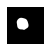

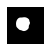

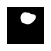

In [6]:
h.mkdir(dataset_folder)

for patient in patients:
    patient_folder = os.path.join(input_folder, patient)
    labels = h.listdir(patient_folder)
    labels = [label for label in labels if '.json' in label]
    
    h.mkdir(os.path.join(dataset_folder, patient))
    
    for label in labels:
        save_label_image(os.path.join(input_folder, patient, label))

In [ ]:
manual_folder = '../dataset_pericardium_manual'
h.mkdir('../dataset_pericardium_manual')
